# K-means clustring


In [19]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

# Looking the data

In [4]:
data = pd.read_csv('Countryclusters.csv')
data

,country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.01,10.40,German
5,Australia,-25.45,133.11,English


(-90.0, 90.0)

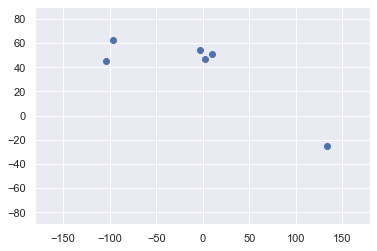

In [5]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180, 180)
plt.ylim(-90, 90)

In [6]:
x = data.iloc[:, 1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.01,10.40
5,-25.45,133.11


In [7]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [8]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 2, 2, 2, 0])

In [9]:
data_with_clusters = data
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters

,country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,2
3,UK,54.01,-2.53,English,2
4,Germany,51.01,10.40,German,2
5,Australia,-25.45,133.11,English,0


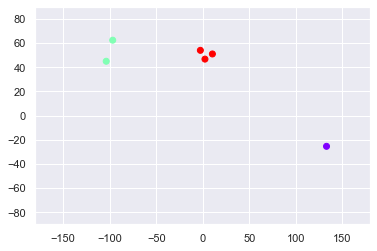

In [10]:
plt.scatter(data['Longitude'], data['Latitude'], c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

In [11]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({ 'English':0, 'French':1, 'German': 2})
data_mapped

,country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,0,1
1,Canada,62.40,-96.80,0,1
2,France,46.75,2.40,1,2
3,UK,54.01,-2.53,0,2
4,Germany,51.01,10.40,2,2
5,Australia,-25.45,133.11,0,0


In [12]:
x = data_mapped.iloc[:, 3:4]
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


In [13]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [14]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 2, 0, 1, 0])

In [15]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters

,country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,2
3,UK,54.01,-2.53,0,0
4,Germany,51.01,10.40,2,1
5,Australia,-25.45,133.11,0,0


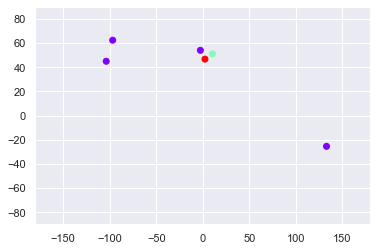

In [16]:
plt.scatter(data['Longitude'], data['Latitude'], c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

# WCSS
with cluster sum of squares

In [17]:
wcss = []
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

wcss

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\AppData\Local\Temp/ipykernel_23140/4039611675.py:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans.fit(x)
C:\Users\HP\AppData\Local\Temp/ipykernel_23140/4039611675.py:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(x)
C:\Users\HP\AppData\Local\Temp/ipykernel_23140/4039611675.py:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(x)


[3.5, 0.5, 0.0, 0.0, 0.0, 0.0]

Text(0, 0.5, 'WCSS')

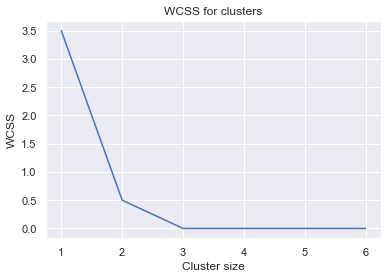

In [18]:
num_clusters = range(1,7)
plt.plot(num_clusters, wcss)
plt.title("WCSS for clusters")
plt.xlabel("Cluster size")
plt.ylabel("WCSS")